# Workshop5. Линейная регрессия. (33 балла)

> Линейная регрессия - это не повод для затяжной депрессии.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [Лекция в рамках проекта deeplay[lab] про линейные модели А.Н.Шевляков](https://youtu.be/n9I5BBBZmRU)
- [Учебник ML от ШАД — линейные модели](https://ml-handbook.ru/chapters/linear_models/intro)
- Заметки из курса [Машинное обучение на ФКН ВШЭ](https://github.com/esokolov/ml-course-hse)
  - [лекция 1](99-extra__ml-course-hse__lecture02-linregr.pdf)
  - [лекция 2](99-extra__ml-course-hse__lecture03-linregr.pdf)
  - [лекция 3](99-extra__ml-course-hse__lecture04-linregr.pdf)
- [Статья про лин.рег. от ODS на habrahabr](https://habr.com/ru/company/ods/blog/323890/)

## Данные

Возьмем датасет о стоимости домов: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

Он лежит в `./data/house_prices.csv.gz`

```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```

Целевой переменной будет `SalePrice`. То есть мы будем предсказывать стоимость жилья на основе его характеристик.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('./data/house_prices.csv.gz', index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
assert df.shape == (1460, 80)

In [ ]:
df.columns

NameError: name 'df' is not defined

## 1.0 Анализ целевого признака (3 балла)

Удостоверимся, что раcпределение целевого признака "хорошее", без странных выбросов. В идеале мы хотим видеть нормальное распределени или достаточно похожее на него, без очень длинных "хвостов" выбросов.

_Почему требуется нормальность распределения: ищите объяснения линейной регресси через алгоритмы максимизации правдоподобия. В итоге, грубо говоря, суть сводится к тому, что с ростом объема выборки, оценка максимального правдоподобия лучше описывает нормальное распределение._

[Коэффициент эксцесса](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0) показывает степень остроты пика распределения случайной величины. Для нормального распределения он равен `0`. Если хвосты распределения «тяжелее», а пик более «приплюснутый», чем у нормального распределения, то коэффициент < 0. А если хвосты легкие, то больше 0. В нашем случае должно получиться околов `6.5`.

Задание:
- Нарисуйте график распределения `SalePrice`, используйте аргумент `fit=scipy.stats.norm`, чтобы нарисовать предполагаемое нормальное распределение. Напечатайте значение коэффициент эксцесса `kurtosis` для этого признака.
- Нарисуйте график [scipy.stats.probplot](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html) - он покажет нам реальные квантили выборки и теоретические. По нему можно видеть, на сколько много выьросов и на сколько выборка предсказуема.
- Что вы можете сказать по поводу выборки основываясь на `probplot`.  [wiki](https://en.wikipedia.org/wiki/Normal_probability_plot)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'Ga

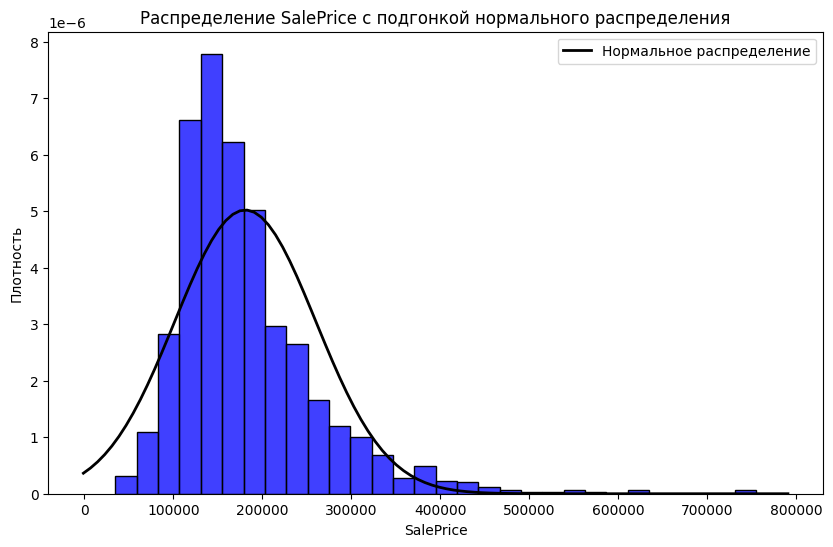

Коэффициент эксцесса для SalePrice: 6.509812011089439


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/train[1].csv'

# Загрузка данных
df = pd.read_csv(file_path, index_col='Id')

# Проверка формы данных
assert df.shape == (1460, 80)
print(df.columns)

# Построение гистограммы с наложением нормального распределения
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=False, stat="density", bins=30, color='blue')

# Плотность нормального распределения для сравнения
mu, sigma = norm.fit(df['SalePrice'])  # Математическое ожидание (mu) и стандартное отклонение (sigma)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label='Нормальное распределение')

plt.title('Распределение SalePrice с подгонкой нормального распределения')
plt.xlabel('SalePrice')
plt.ylabel('Плотность')
plt.legend()
plt.show()

# Расчет коэффициента эксцесса (kurtosis) для SalePrice
kurtosis_value = stats.kurtosis(df['SalePrice'])
print(f'Коэффициент эксцесса для SalePrice: {kurtosis_value}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Коэффициент эксцесса для SalePrice: 6.509812011089439


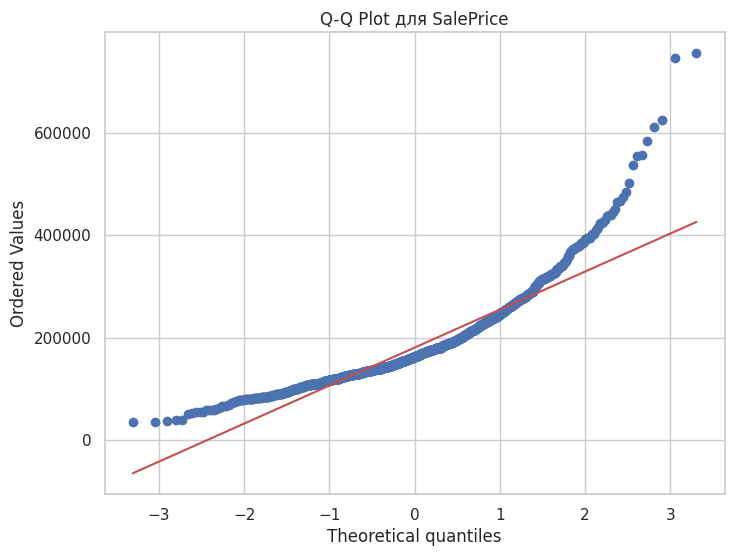

In [18]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Путь к файлу
file_path = '/content/drive/My Drive/train[1].csv'

# Загрузка данных
df = pd.read_csv(file_path)

# Вычисление и вывод коэффициента эксцесса
kurtosis_value = stats.kurtosis(df['SalePrice'])
print(f"Коэффициент эксцесса для SalePrice: {kurtosis_value}")

# Построение графика квантиль-квантиль (Q-Q) plot
plt.figure(figsize=(8, 6))
stats.probplot(df['SalePrice'], dist="norm", plot=plt)
plt.title('Q-Q Plot для SalePrice')
plt.show()


## 1.2 Анализ некоторых зависимостей (3 балла)

У нас очень много разных признаков. Любопытно построить разные графики. Позаботьтесь о красоте и наглядности графиков, сделайте так, чтобы они были большими и их можно было прочесть. Даже подписи на графиках должны быть читаемые!!

Задания: Постройте графики, отражающие зависимости этих признаков:
- дата постройки дома и его стоимости
- "качество дома и материалов" и его стоимости
- площадь дома и стоимость

Hints: Вспомните про boxplot, jointplot, lmplot...

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 1000x600 with 0 Axes>

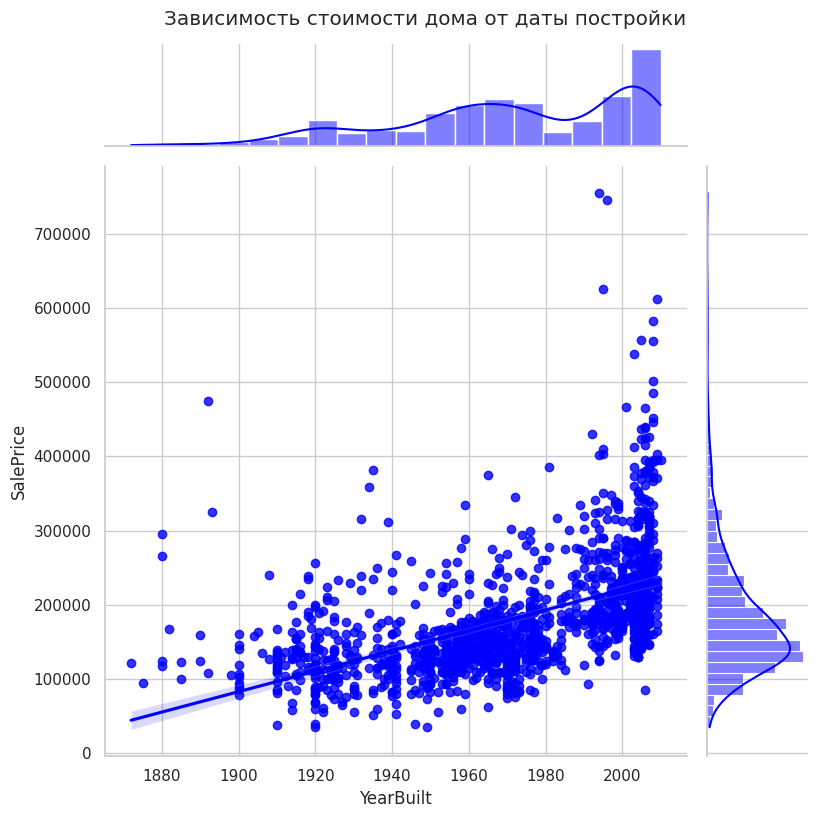

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Путь к файлу
file_path = '/content/drive/My Drive/train[1].csv'

# Загрузка данных
df = pd.read_csv(file_path)

# Установка стиля графика
sns.set(style="whitegrid")

# График 1: Зависимость стоимости дома от даты постройки (YearBuilt) с использованием jointplot
# Jointplot покажет совместное распределение (scatter plot) и маргинальные распределения (гистограммы)
plt.figure(figsize=(10, 6))
sns.jointplot(x='YearBuilt', y='SalePrice', data=df, kind='reg', height=8, color="blue")
plt.suptitle('Зависимость стоимости дома от даты постройки', y=1.02)
plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-20-afa136c776c5>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OverallQual', y='SalePrice', data=df, palette='coolwarm')


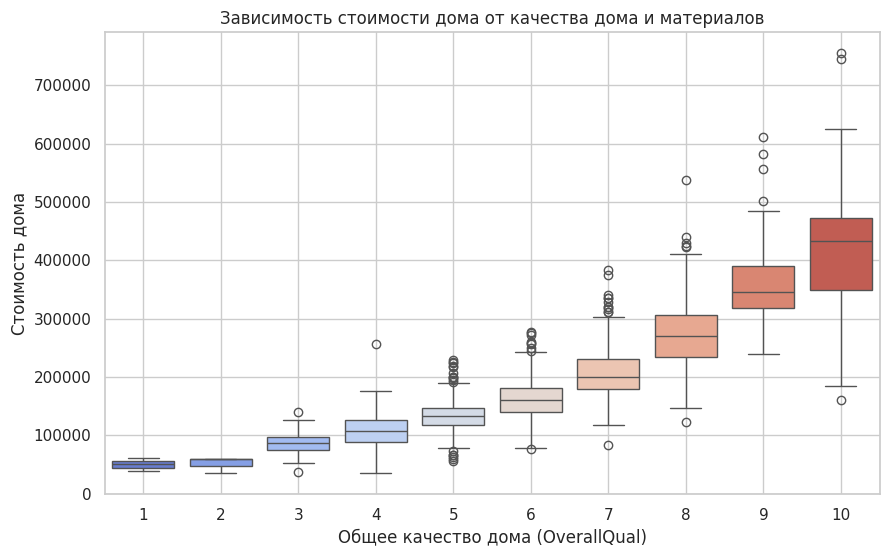

In [20]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Путь к файлу
file_path = '/content/drive/My Drive/train[1].csv'

# Загрузка данных
df = pd.read_csv(file_path)

# Установка стиля графика
sns.set(style="whitegrid")

# График 2: Зависимость стоимости дома от качества дома и материалов (OverallQual) с использованием boxplot
# Boxplot визуализирует медиану, квартили и выбросы
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df, palette='coolwarm')
plt.title('Зависимость стоимости дома от качества дома и материалов')
plt.xlabel('Общее качество дома (OverallQual)')
plt.ylabel('Стоимость дома')
plt.grid(True)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 1000x600 with 0 Axes>

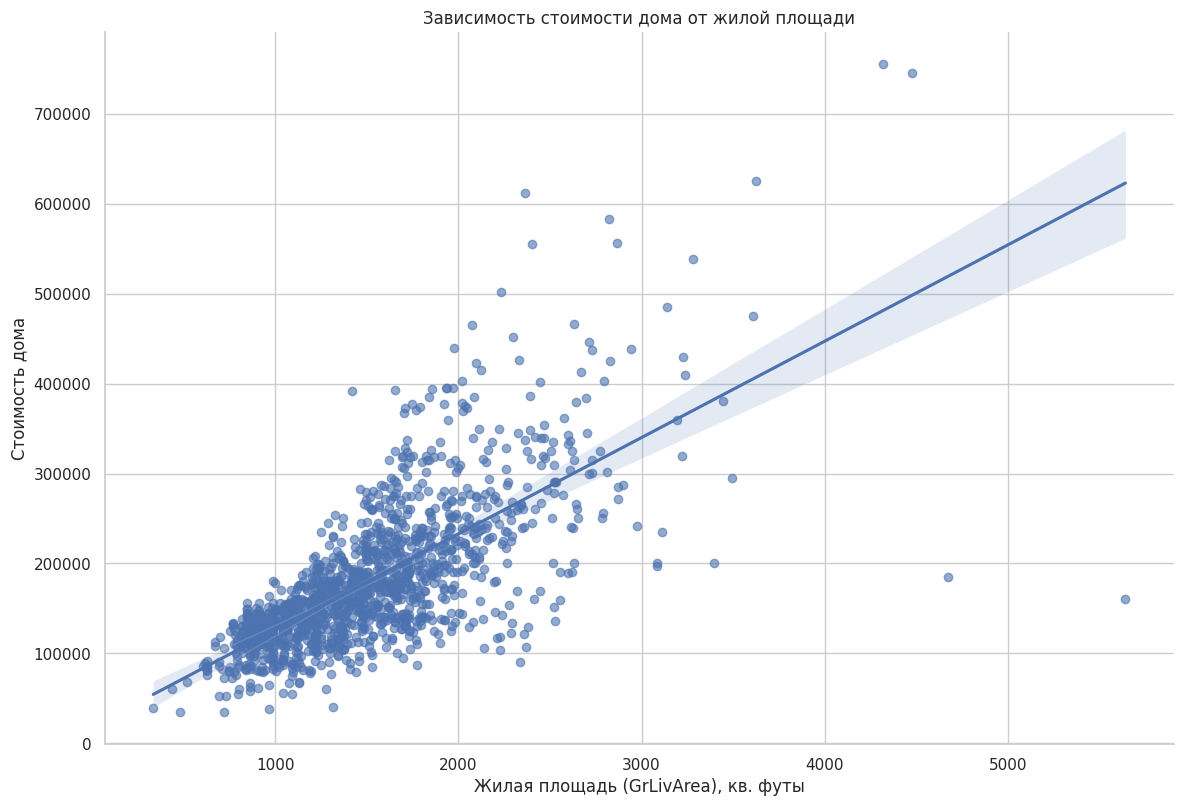

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Путь к файлу
file_path = '/content/drive/My Drive/train[1].csv'

# Загрузка данных
df = pd.read_csv(file_path)

# Установка стиля графика
sns.set(style="whitegrid")

# График 3: Зависимость стоимости дома от площади дома (GrLivArea) с использованием lmplot
# Lmplot добавляет линейную регрессию на scatterplot, чтобы показать тренд
plt.figure(figsize=(10, 6))
sns.lmplot(x='GrLivArea', y='SalePrice', data=df, height=8, aspect=1.5, scatter_kws={'alpha':0.6})
plt.title('Зависимость стоимости дома от жилой площади')
plt.xlabel('Жилая площадь (GrLivArea), кв. футы')
plt.ylabel('Стоимость дома')
plt.grid(True)
plt.show()




## 1.2 Heatmap (3 балла)

Судя по предыдущим графикам, есть некоторые линейные зависимости. Но строить по графику на каждый признак из 80 штук немного долго и не наглядно. Постройте красивый график корреляции всех признаков. Используйте цвета `RdYlGn`, так будет нагляднее. Не забудьте применить маску, чтобы убрать дублирующую половину матрицы.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


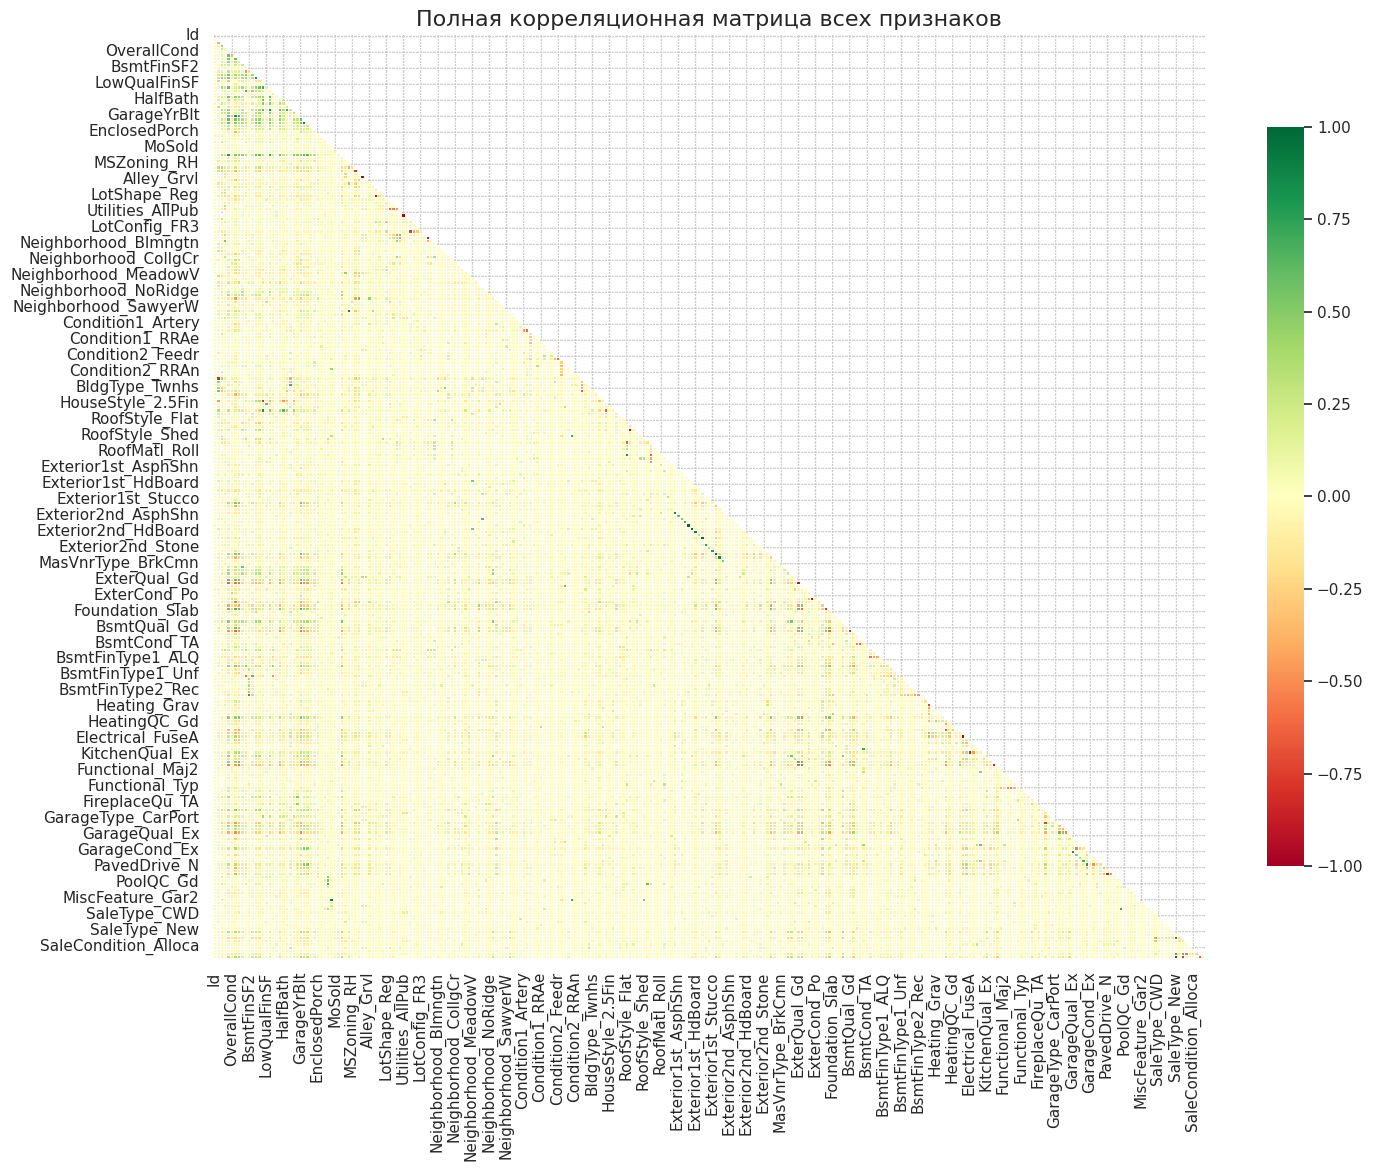

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Путь к файлу
file_path = '/content/drive/My Drive/train[1].csv'

# Загрузка данных
df = pd.read_csv(file_path)

# Преобразование категориальных признаков в числовые с помощью get_dummies
df_encoded = pd.get_dummies(df)

# Вычисление корреляционной матрицы для закодированных данных
corr_matrix = df_encoded.corr()

# Создание маски для верхней половины матрицы (чтобы скрыть дублирующиеся значения)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Настройка размеров графика
plt.figure(figsize=(16, 12))

# Построение heatmap с корреляциями
sns.heatmap(corr_matrix, mask=mask, cmap='RdYlGn', annot=False, fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8})

# Настройки заголовка
plt.title('Полная корреляционная матрица всех признаков', size=16)
plt.show()



Большая матрица 38x38 ячеек. И мы видим, там есть сильно коррелируемые объекты с нашей целевой переменной.

- Нарисуйте крупно heatmap этих сильно коррелируемых объектов( больше 0.5 по абсолютному значению) и сделайте так, чтобы в каждой ячейке было значение корреляции.
- Выведите список этих сильно коррелируемых признаков.
- Желательно сделать heatmap диагональной матрицей, чтобы было красиво (в теории был пример)

Запомним эти признаки!

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Сильно коррелируемые признаки с SalePrice (более 0.5 по абсолютному значению):
['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice', 'ExterQual_TA', 'BsmtQual_Ex', 'KitchenQual_Ex', 'KitchenQual_TA']


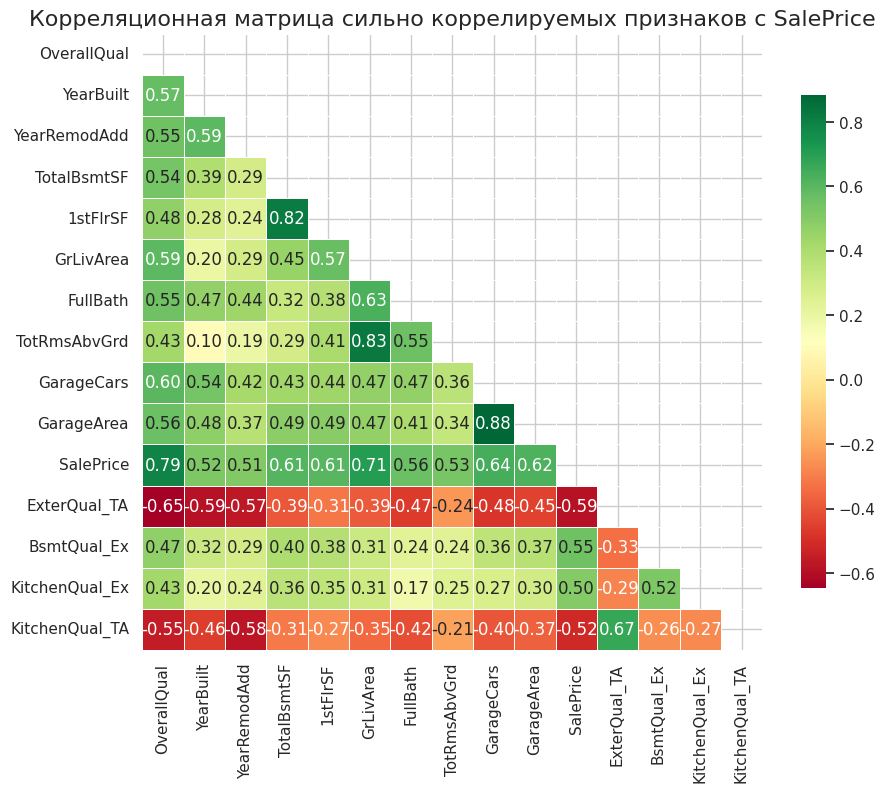

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Путь к файлу
file_path = '/content/drive/My Drive/train[1].csv'

# Загрузка данных
df = pd.read_csv(file_path)

# Шаг 1: Найдем признаки, которые сильно коррелируют с SalePrice (более 0.5 по абсолютному значению)
strong_corr = corr_matrix['SalePrice'][corr_matrix['SalePrice'].abs() > 0.5]

# Выводим список этих сильно коррелируемых признаков
strong_corr_features = strong_corr.index.tolist()
print("Сильно коррелируемые признаки с SalePrice (более 0.5 по абсолютному значению):")
print(strong_corr_features)

# Шаг 2: Построим корреляционную матрицу только для этих признаков
strong_corr_matrix = corr_matrix.loc[strong_corr_features, strong_corr_features]

# Шаг 3: Построим heatmap для этой подматрицы с диагональной структурой
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(strong_corr_matrix, dtype=bool)) # Маска для скрытия верхней половины
sns.heatmap(strong_corr_matrix, mask=mask, cmap='RdYlGn', annot=True, fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Корреляционная матрица сильно коррелируемых признаков с SalePrice', size=16)
plt.show()



## 1.3 Пропущеные данные (3 балла)

Задание:
 - Посчитайте общее количество пропущенных данных по каждому признаку
 - посчитайте долю пропущенных данных выборки
 - удалите из выборки признаки, доля пропущенных которых больще 10%
 - пропущенные категориальные заполните словом 'unknown' (у них dtype object)
 - пропущенные числовые заполните средним (у них dtype float)

Hinst: https://stackoverflow.com/a/38134049/3205200

In [24]:
import pandas as pd

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Путь к файлу
file_path = '/content/drive/My Drive/train[1].csv'

# Загрузка данных
df = pd.read_csv(file_path)

# 1. Посчитайте общее количество пропущенных данных по каждому признаку
missing_data = df.isnull().sum()
print("Общее количество пропущенных данных по каждому признаку:")
print(missing_data)

# 2. Посчитайте долю пропущенных данных выборки
missing_data_percent = (df.isnull().sum() / len(df)) * 100
print("\nДоля пропущенных данных по каждому признаку (%):")
print(missing_data_percent)

# 3. Удалите из выборки признаки, доля пропущенных которых больше 10%
columns_to_drop = missing_data_percent[missing_data_percent > 10].index
df_cleaned = df.drop(columns=columns_to_drop)
print(f"\nУдалены признаки, в которых пропущено более 10% данных: {list(columns_to_drop)}")

# 4. Пропущенные категориальные данные (dtype == object) заполните словом 'unknown'
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna('unknown')

# 5. Пропущенные числовые данные (dtype == float) заполните средним
numerical_cols = df_cleaned.select_dtypes(include=['float64']).columns
df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].mean())

# Проверка, что пропуски устранены
print("\nПроверка оставшихся пропусков:")
print(df_cleaned.isnull().sum())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Общее количество пропущенных данных по каждому признаку:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Доля пропущенных данных по каждому признаку (%):
Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

Удалены признаки, в которых пропущено более 10% данных: ['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

Проверка оставшихся пропусков:
Id     

## 1.4 Категориальные переменные (1 балл)

На сколько вы помните, линейная регрессия не умеет обрабатывать категориальные признаки, так как ей нужны ЧИСЛА. Но не беда, в pandas есть встроенная функция [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Задание:
- сконвертируйте все категориальные признаки(dtype=object) в вектора числовых с помощью get_dummies
- напечатайте сколько у вас теперь признаков
- Положите в переменную X все данные из датасета, кроме целевой переменной. Положите в переменную y только целевую переменную.

In [27]:
import pandas as pd

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Путь к файлу
file_path = '/content/drive/My Drive/train[1].csv'

# Загрузка данных
df = pd.read_csv(file_path)

# 1. Преобразование категориальных признаков (dtype=object) в числовые с помощью get_dummies
df_encoded = pd.get_dummies(df, drop_first=True) # drop_first=True убирает первую категорию, чтобы избежать мультиколлинеарности

# 2. Вывод количества признаков после преобразования
print(f"Количество признаков после преобразования: {df_encoded.shape[1]}")

# 3. Положите в переменную X все данные из датасета, кроме целевой переменной 'SalePrice'
X = df_encoded.drop('SalePrice', axis=1)

# 4. Положите в переменную y только целевую переменную 'SalePrice'
y = df_encoded['SalePrice']

# Проверим, что X и y сформированы корректно
print("Первые несколько строк данных X:")
print(X.head())

print("\nПервые несколько значений целевой переменной y:")
print(y.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Количество признаков после преобразования: 246
Первые несколько строк данных X:
   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0         706  ...           False           False   
1          1976         0.0         978  ...           False           False   
2          2002       162.0         486  ...           False          

## 1.5 Переобучение (3 балла)

Обучим обычную модель без регуляризации [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

- Выведите все коэффициенты для каждого признака, отсортировав по возрастанию по модулю значения коэффициента. Используйте print и for, иначе jupyter схлопнет вывод numpy массива. Можете округлить коэффициенты до 2 знаков после запятой.
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)

In [32]:
import pandas as pd
import numpy as np
import sklearn.linear_model
import sklearn.model_selection

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Путь к файлу
file_path = '/content/drive/My Drive/train[1].csv'

# Загрузка данных
df = pd.read_csv(file_path)

# Импортируем LinearRegression из sklearn
from sklearn.linear_model import LinearRegression

# Преобразование категориальных признаков в числовые с помощью get_dummies
df_encoded = pd.get_dummies(df, drop_first=True, dtype=float)

# Разделение на X (признаки) и y (целевая переменная)
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

# Заполнение пропущенных значений для числовых признаков
numerical_cols = X.select_dtypes(include=['float64']).columns
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].mean())

# 1. Обучение модели линейной регрессии без регуляризации
model = LinearRegression()
model.fit(X, y)

# Получение коэффициентов модели
coefficients = model.coef_

# Создаем DataFrame с признаками и их коэффициентами
coef_df = pd.DataFrame({
    'Признак': X.columns,
    'Коэффициент': coefficients
})

# Сортируем по возрастанию модуля коэффициентов
coef_df['Модуль коэффициента'] = coef_df['Коэффициент'].abs()
coef_df_sorted = coef_df.sort_values(by='Модуль коэффициента')

# 2. Вывод коэффициентов, округленных до 2 знаков, по возрастанию по модулю
print("Коэффициенты модели (по возрастанию модуля):")
for _, row in coef_df_sorted.iterrows():
    print(f"{row['Признак']}: {round(row['Коэффициент'], 2)}")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Коэффициенты модели (по возрастанию модуля):
MiscVal: 0.03
LotArea: 0.72
Id: 1.13
EnclosedPorch: 2.13
BsmtUnfSF: -2.6
OpenPorchSF: 2.85
BsmtFinSF2: 9.38
Fence_GdWo: 10.59
GarageYrBlt: -10.91
WoodDeckSF: 14.99
BsmtFinSF1: 15.32
GarageArea: 15.46
MasVnrArea: 19.19
1stFlrSF: 20.04
TotalBsmtSF: 22.09
GrLivArea: 25.46
LowQualFinSF: -30.83
3SsnPorch: 34.68
2ndFlrSF: 36.26
ScreenPorch: 37.24
LotFrontage: 38.01
MSSubClass: -40.79
SaleCondition_Partial: -53.3
BsmtCond_Gd: 68.76
YearRemodAdd: 94.22
PavedDrive_Y: -127.61
Electrical_FuseF: 202.77
PoolArea: 206.52
HouseStyle_SFoyer: 228.68
YearBuilt: 331.44
GarageFinish_Unf: -370.28
SaleType_WD: -387.66
MoSold: -469.31
BsmtFinType1_Rec: -515.18
CentralAir_Y: -524.09
YrSold: -618.47
Alley_Pave: 831.17
SaleCondition_Family: 926.0
Neighborhood_BrDale: -929.77
Neighborhood_Veenker: 946.41
BsmtHalfBath: -1052.76
Neighborhood_B

In [34]:
import pandas as pd
import numpy as np

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Путь к файлу
file_path = '/content/drive/My Drive/train[1].csv'

# Загрузка данных
df = pd.read_csv(file_path)

# Импортируем необходимые библиотеки из sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Преобразование категориальных признаков в числовые с помощью get_dummies
df_encoded = pd.get_dummies(df, drop_first=True, dtype=float)

# Разделение на X (признаки) и y (целевая переменная)
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

# Заполнение пропущенных значений для числовых признаков
numerical_cols = X.select_dtypes(include=['float64']).columns
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].mean())

# 1. Обучение модели линейной регрессии без регуляризации
model = LinearRegression()
model.fit(X, y)

# 2. Оценка качества модели с использованием кросс-валидации (cv=5)
mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Вычисление среднего MSE
mean_mse = np.mean(mse_scores)

# Выводим среднюю ошибку (MSE)
print(f"\nСредняя ошибка предсказания (MSE) на 5 фолдах: {abs(mean_mse):.2f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Средняя ошибка предсказания (MSE) на 5 фолдах: 1934467908.36


К счастью в этот раз коэффициенты при признаках не улетели в космос, но всё равно достигли очень больших значений. Например `RoofStyle_Shed` получился в моем случае около `-514961`. А у некоторых признаков коэффициент уже равен 0, хотя не была применена регуляризация.

## 1.6 Ridge и Lasso (4 балла)

- Обучите Lasso и Ridge для разных значений регуляризации alpha
- нарисуйте график значений коэффициентов модели для каждого признака, как мы делали на практике. По оси X будет значение alpha, по Y - значение коэффициента. на графике будет "радуга" из линий разных цветов(линий столько, сколько признаков).
- Нарисуйте гистограмму, в которой по оси Y будет количество коэффициентов, равных 0 (<0.0001) для Loss регресиии, а по оси X - значение коэффициента альфа.

alpha взять от 1 до 500 с каким-нибудь шагом. Но не переборщите, а то долго будете ждать.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


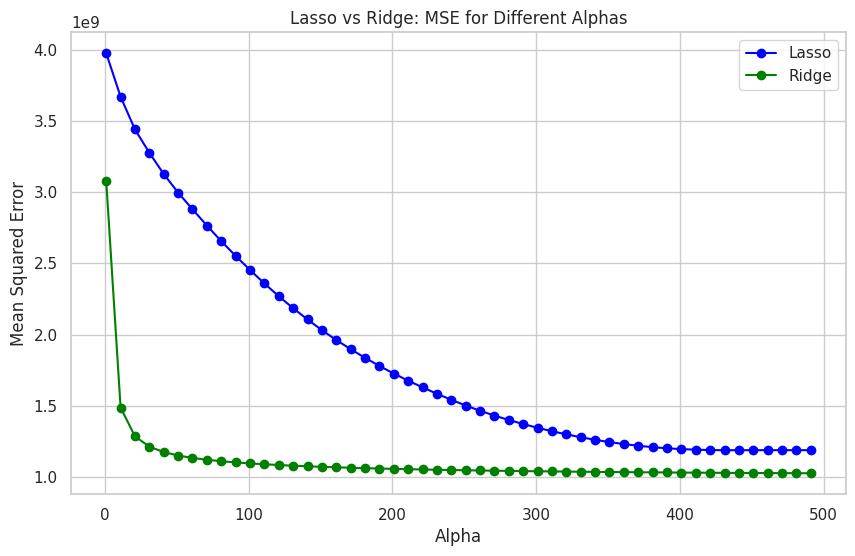

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Путь к файлу
file_path = '/content/drive/My Drive/train[1].csv'

# Загрузка данных
df = pd.read_csv(file_path)

# Преобразование категориальных признаков в числовые с помощью get_dummies
df_encoded = pd.get_dummies(df, drop_first=True, dtype=float)

# Разделение на признаки и целевую переменную
X = df_encoded.drop(columns=['SalePrice'])
y = df_encoded['SalePrice']

numerical_cols = X.select_dtypes(include=['float64']).columns
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].mean())

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=333)

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Значения alpha от 1 до 500 с шагом 50
alphas = np.arange(1, 501, 10)

# Списки для сохранения среднеквадратичных ошибок
lasso_errors = []
ridge_errors = []

# Обучение и оценка моделей Lasso и Ridge для каждого значения alpha
for alpha in alphas:
    # Модель Lasso
    lasso = Lasso(alpha=alpha, random_state=333, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso.predict(X_test_scaled)
    lasso_mse = mean_squared_error(y_test, y_pred_lasso)
    lasso_errors.append(lasso_mse)

    # Модель Ridge
    ridge = Ridge(alpha=alpha, random_state=333)
    ridge.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge.predict(X_test_scaled)
    ridge_mse = mean_squared_error(y_test, y_pred_ridge)
    ridge_errors.append(ridge_mse)

# Визуализация среднеквадратичных ошибок для Lasso и Ridge
plt.figure(figsize=(10, 6))

# График для Lasso
plt.plot(alphas, lasso_errors, label='Lasso', marker='o', color='blue')

# График для Ridge
plt.plot(alphas, ridge_errors, label='Ridge', marker='o', color='green')

# Настройка графика
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Lasso vs Ridge: MSE for Different Alphas')
plt.legend()
plt.grid(True)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-37-e785757ae1f1>:61: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


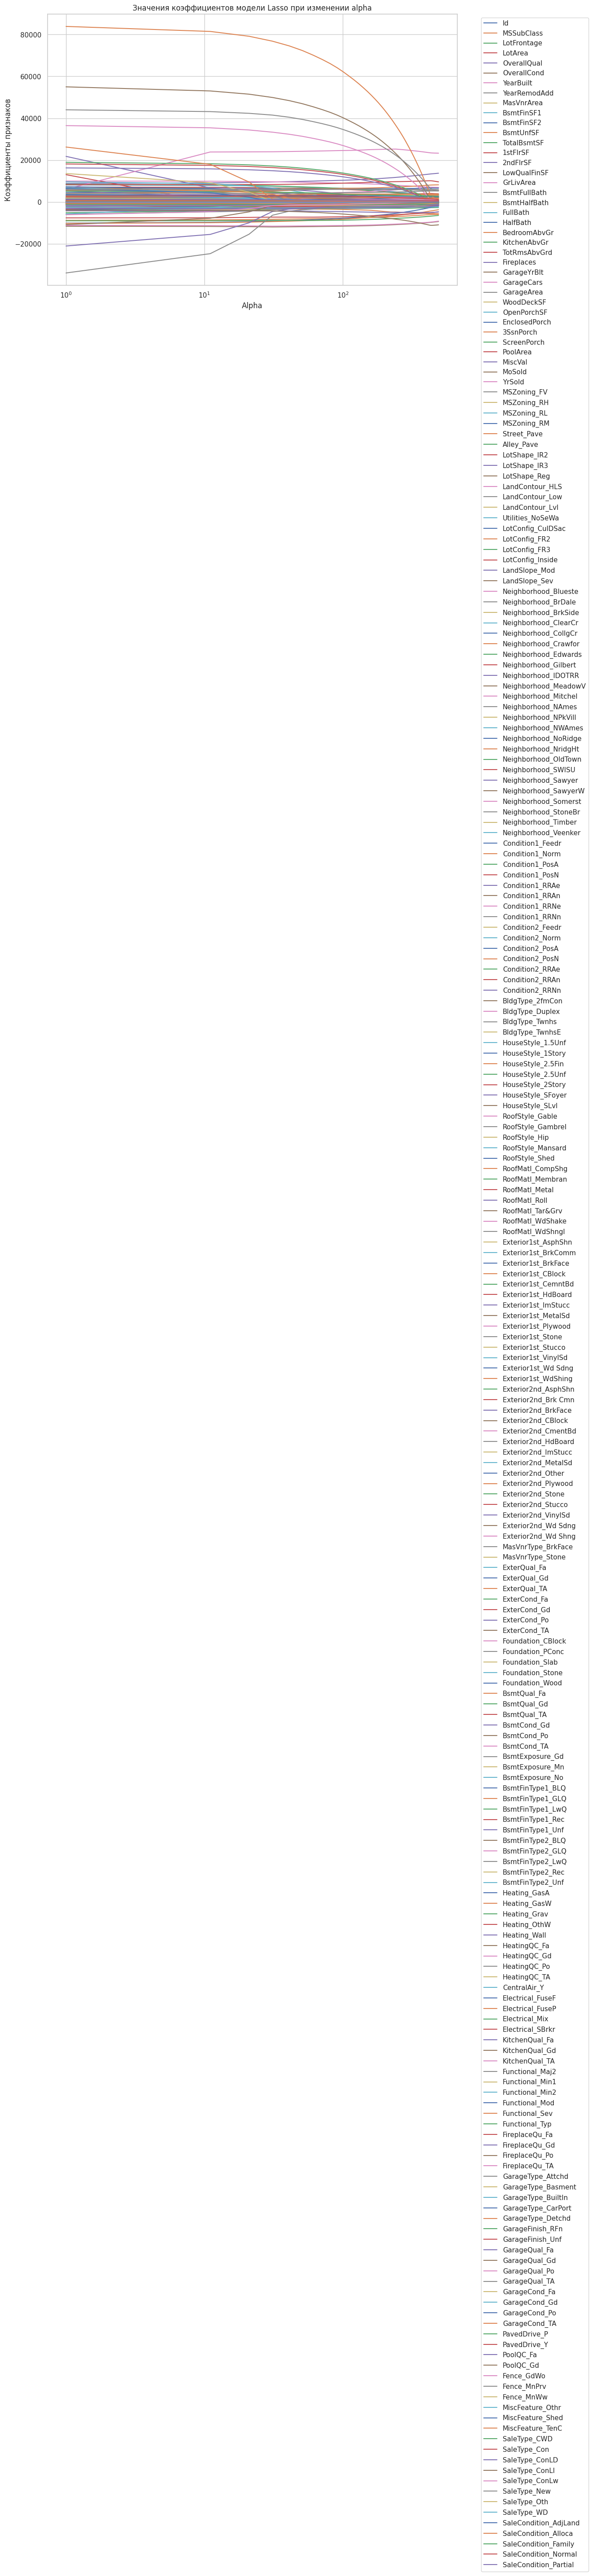

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Путь к файлу
file_path = '/content/drive/My Drive/train[1].csv'

# Загрузка данных
df = pd.read_csv(file_path)

# Преобразование категориальных признаков в числовые с помощью get_dummies
df_encoded = pd.get_dummies(df, drop_first=True, dtype=float)

# Разделение на признаки и целевую переменную
X = df_encoded.drop(columns=['SalePrice'])
y = df_encoded['SalePrice']

numerical_cols = X.select_dtypes(include=['float64']).columns
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].mean())

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Значения alpha от 1 до 500 с шагом 10
alphas = np.arange(1, 501, 10)

# Список для хранения коэффициентов модели для каждого alpha
coefficients = []

# Для каждого alpha обучаем модель Lasso и сохраняем коэффициенты
for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=3, max_iter=10000)
    lasso.fit(X_scaled, y)
    coefficients.append(lasso.coef_)

# Преобразуем список коэффициентов в DataFrame для удобства
coefficients = np.array(coefficients)
coefficients_df = pd.DataFrame(coefficients, columns=X.columns, index=alphas)

# Построение графика
plt.figure(figsize=(12, 8))

# Для каждого признака строим линию на графике
for column in coefficients_df.columns:
    plt.plot(alphas, coefficients_df[column], label=column)

# Настройка осей и графика
plt.xscale('log')  # Логарифмическая шкала для alpha
plt.xlabel('Alpha')
plt.ylabel('Коэффициенты признаков')
plt.title('Значения коэффициентов модели Lasso при изменении alpha')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Легенда вне графика
plt.grid(True)
plt.tight_layout()
plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


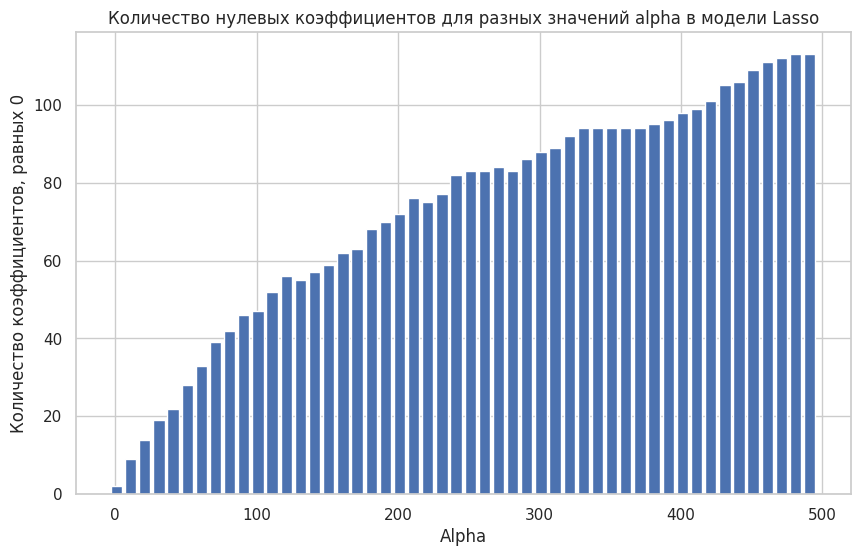

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Путь к файлу
file_path = '/content/drive/My Drive/train[1].csv'

# Загрузка данных
df = pd.read_csv(file_path)

# Преобразование категориальных признаков в числовые с помощью get_dummies
df_encoded = pd.get_dummies(df, drop_first=True, dtype=float)

# Разделение на признаки и целевую переменную
X = df_encoded.drop(columns=['SalePrice'])
y = df_encoded['SalePrice']

numerical_cols = X.select_dtypes(include=['float64']).columns
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].mean())

# Нормализация данных (Lasso чувствителен к масштабу данных)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Значения alpha от 1 до 500 с шагом 10
alphas = np.arange(1, 501, 10)

# Список для хранения количества нулевых коэффициентов для каждого alpha
zero_coefficients_count = []

# Для каждого alpha обучаем модель Lasso и подсчитываем количество коэффициентов, близких к нулю
for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=333, max_iter=10000)
    lasso.fit(X_scaled, y)
    # Подсчёт коэффициентов, которые меньше 0.0001 по абсолютной величине
    num_zeros = np.sum(np.abs(lasso.coef_) < 0.0001)
    zero_coefficients_count.append(num_zeros)

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.bar(alphas, zero_coefficients_count, width=8)  # Столбцы гистограммы
plt.xlabel('Alpha')
plt.ylabel('Количество коэффициентов, равных 0')
plt.title('Количество нулевых коэффициентов для разных значений alpha в модели Lasso')
plt.grid(True)
plt.show()




## 1.7 Поиск оптимального alpha (6 баллов)

- С помощью метода LassoCV найдите оптимальное значение alpha и напечатайте его, используя разбиение на 5 фолда в кроссвалидации (`cv=5`).
- Нарисуйте график зависимости MSE от alpha (`mse_path_`).
- Нарисуйте длинную гистограмму магнитуда признаков, как в классе, на которой будет показано значение коэффициента для каждого признака. Графк должен быть остортирован по величине коэффициентов. Признаки с нулевыми коэффициентами должны быть удалены.
- Сколько в итоге ненулевых признаков осталось?
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error). Качество должно быть лучше, чем у простой линейной регрессии.

In [39]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Путь к файлу
file_path = '/content/drive/My Drive/train[1].csv'

# Загрузка данных
df = pd.read_csv(file_path)

# Преобразование категориальных признаков в числовые с помощью get_dummies
df_encoded = pd.get_dummies(df, drop_first=True, dtype=float)

# Разделение на признаки и целевую переменную
X = df_encoded.drop(columns=['SalePrice'])
y = df_encoded['SalePrice']

numerical_cols = X.select_dtypes(include=['float64']).columns
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].mean())

# Нормализация данных (Lasso чувствителен к масштабу данных)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Задаем диапазон значений alpha от 1 до 500 с шагом 10
alphas = np.arange(1, 501, 10)

# Используем LassoCV для поиска оптимального alpha с кросс-валидацией на 5 фолдах
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=333, max_iter=10000)

# Обучаем модель на обучающих данных
lasso_cv.fit(X_scaled, y)

# Печатаем оптимальное значение alpha
print(f"Оптимальное значение alpha: {lasso_cv.alpha_}")

# Также можно вывести значения альфа, которые были использованы, и соответствующие ошибки на каждом из фолдов
print(f"Значения alpha, которые были протестированы: {lasso_cv.alphas_}")
print(f"Средние ошибки на кросс-валидации: {lasso_cv.mse_path_.mean(axis=1)}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Оптимальное значение alpha: 491
Значения alpha, которые были протестированы: [491 481 471 461 451 441 431 421 411 401 391 381 371 361 351 341 331 321
 311 301 291 281 271 261 251 241 231 221 211 201 191 181 171 161 151 141
 131 121 111 101  91  81  71  61  51  41  31  21  11   1]
Средние ошибки на кросс-валидации: [1.12943049e+09 1.13309522e+09 1.13710156e+09 1.14130313e+09
 1.14538115e+09 1.14980437e+09 1.15460336e+09 1.15991091e+09
 1.16573092e+09 1.17208822e+09 1.17893316e+09 1.18613117e+09
 1.19376884e+09 1.20182661e+09 1.21033874e+09 1.21917818e+09
 1.22824218e+09 1.23762062e+09 1.24734243e+09 1.25707591e+09
 1.26714680e+09 1.27750037e+09 1.28825546e+09 1.29944134e+09
 1.31109548e+09 1.32320731e+09 1.33587701e+09 1.34935050e+09
 1.36330144e+09 1.37791962e+09 1.39277196e+09 1.40823810e+09
 1.42407500e+09 1.44007350e+09 1.45676486e+09 1.47415385e+09
 1.493

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


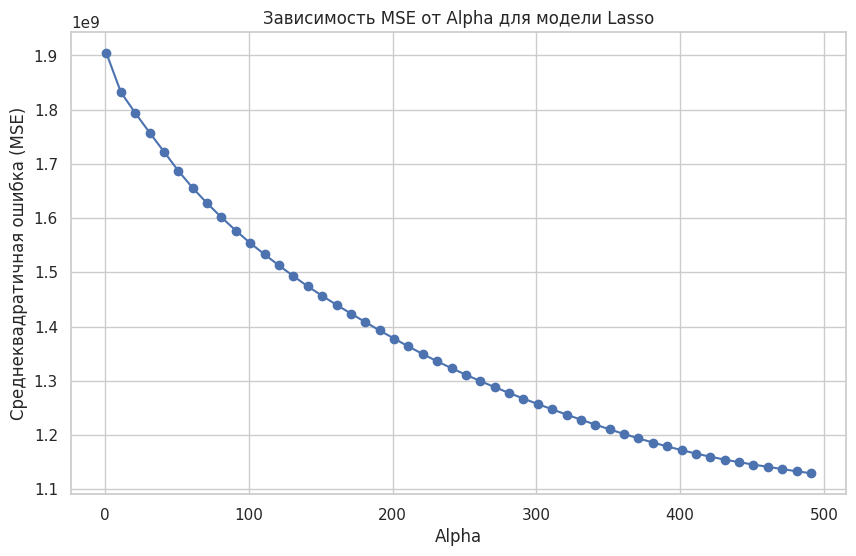

Оптимальное значение alpha: 491


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Путь к файлу
file_path = '/content/drive/My Drive/train[1].csv'

# Загрузка данных
df = pd.read_csv(file_path)


# Преобразование категориальных признаков в числовые с помощью get_dummies
df_encoded = pd.get_dummies(df, drop_first=True, dtype=float)

# Разделение на признаки и целевую переменную
X = df_encoded.drop(columns=['SalePrice'])
y = df_encoded['SalePrice']

numerical_cols = X.select_dtypes(include=['float64']).columns
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].mean())

# Нормализация данных (Lasso чувствителен к масштабу данных)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Задаем диапазон значений alpha от 1 до 500 с шагом 10
alphas = np.arange(1, 501, 10)

# Используем LassoCV для поиска оптимального alpha с кросс-валидацией на 5 фолдах
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=333, max_iter=10000)

# Обучаем модель на нормализованных данных
lasso_cv.fit(X_scaled, y)

# mse_path_ содержит значения MSE для каждого alpha и каждого фолда.
# Среднее значение MSE для каждого alpha:
mse_means = np.mean(lasso_cv.mse_path_, axis=1)

# Построение графика зависимости MSE от alpha
plt.figure(figsize=(10, 6))
plt.plot(lasso_cv.alphas_, mse_means, marker='o', linestyle='-', color='b')
plt.xlabel('Alpha')
plt.ylabel('Среднеквадратичная ошибка (MSE)')
plt.title('Зависимость MSE от Alpha для модели Lasso')
plt.grid(True)
plt.show()

# Печать оптимального значения alpha
print(f"Оптимальное значение alpha: {lasso_cv.alpha_}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Количество ненулевых признаков: 132


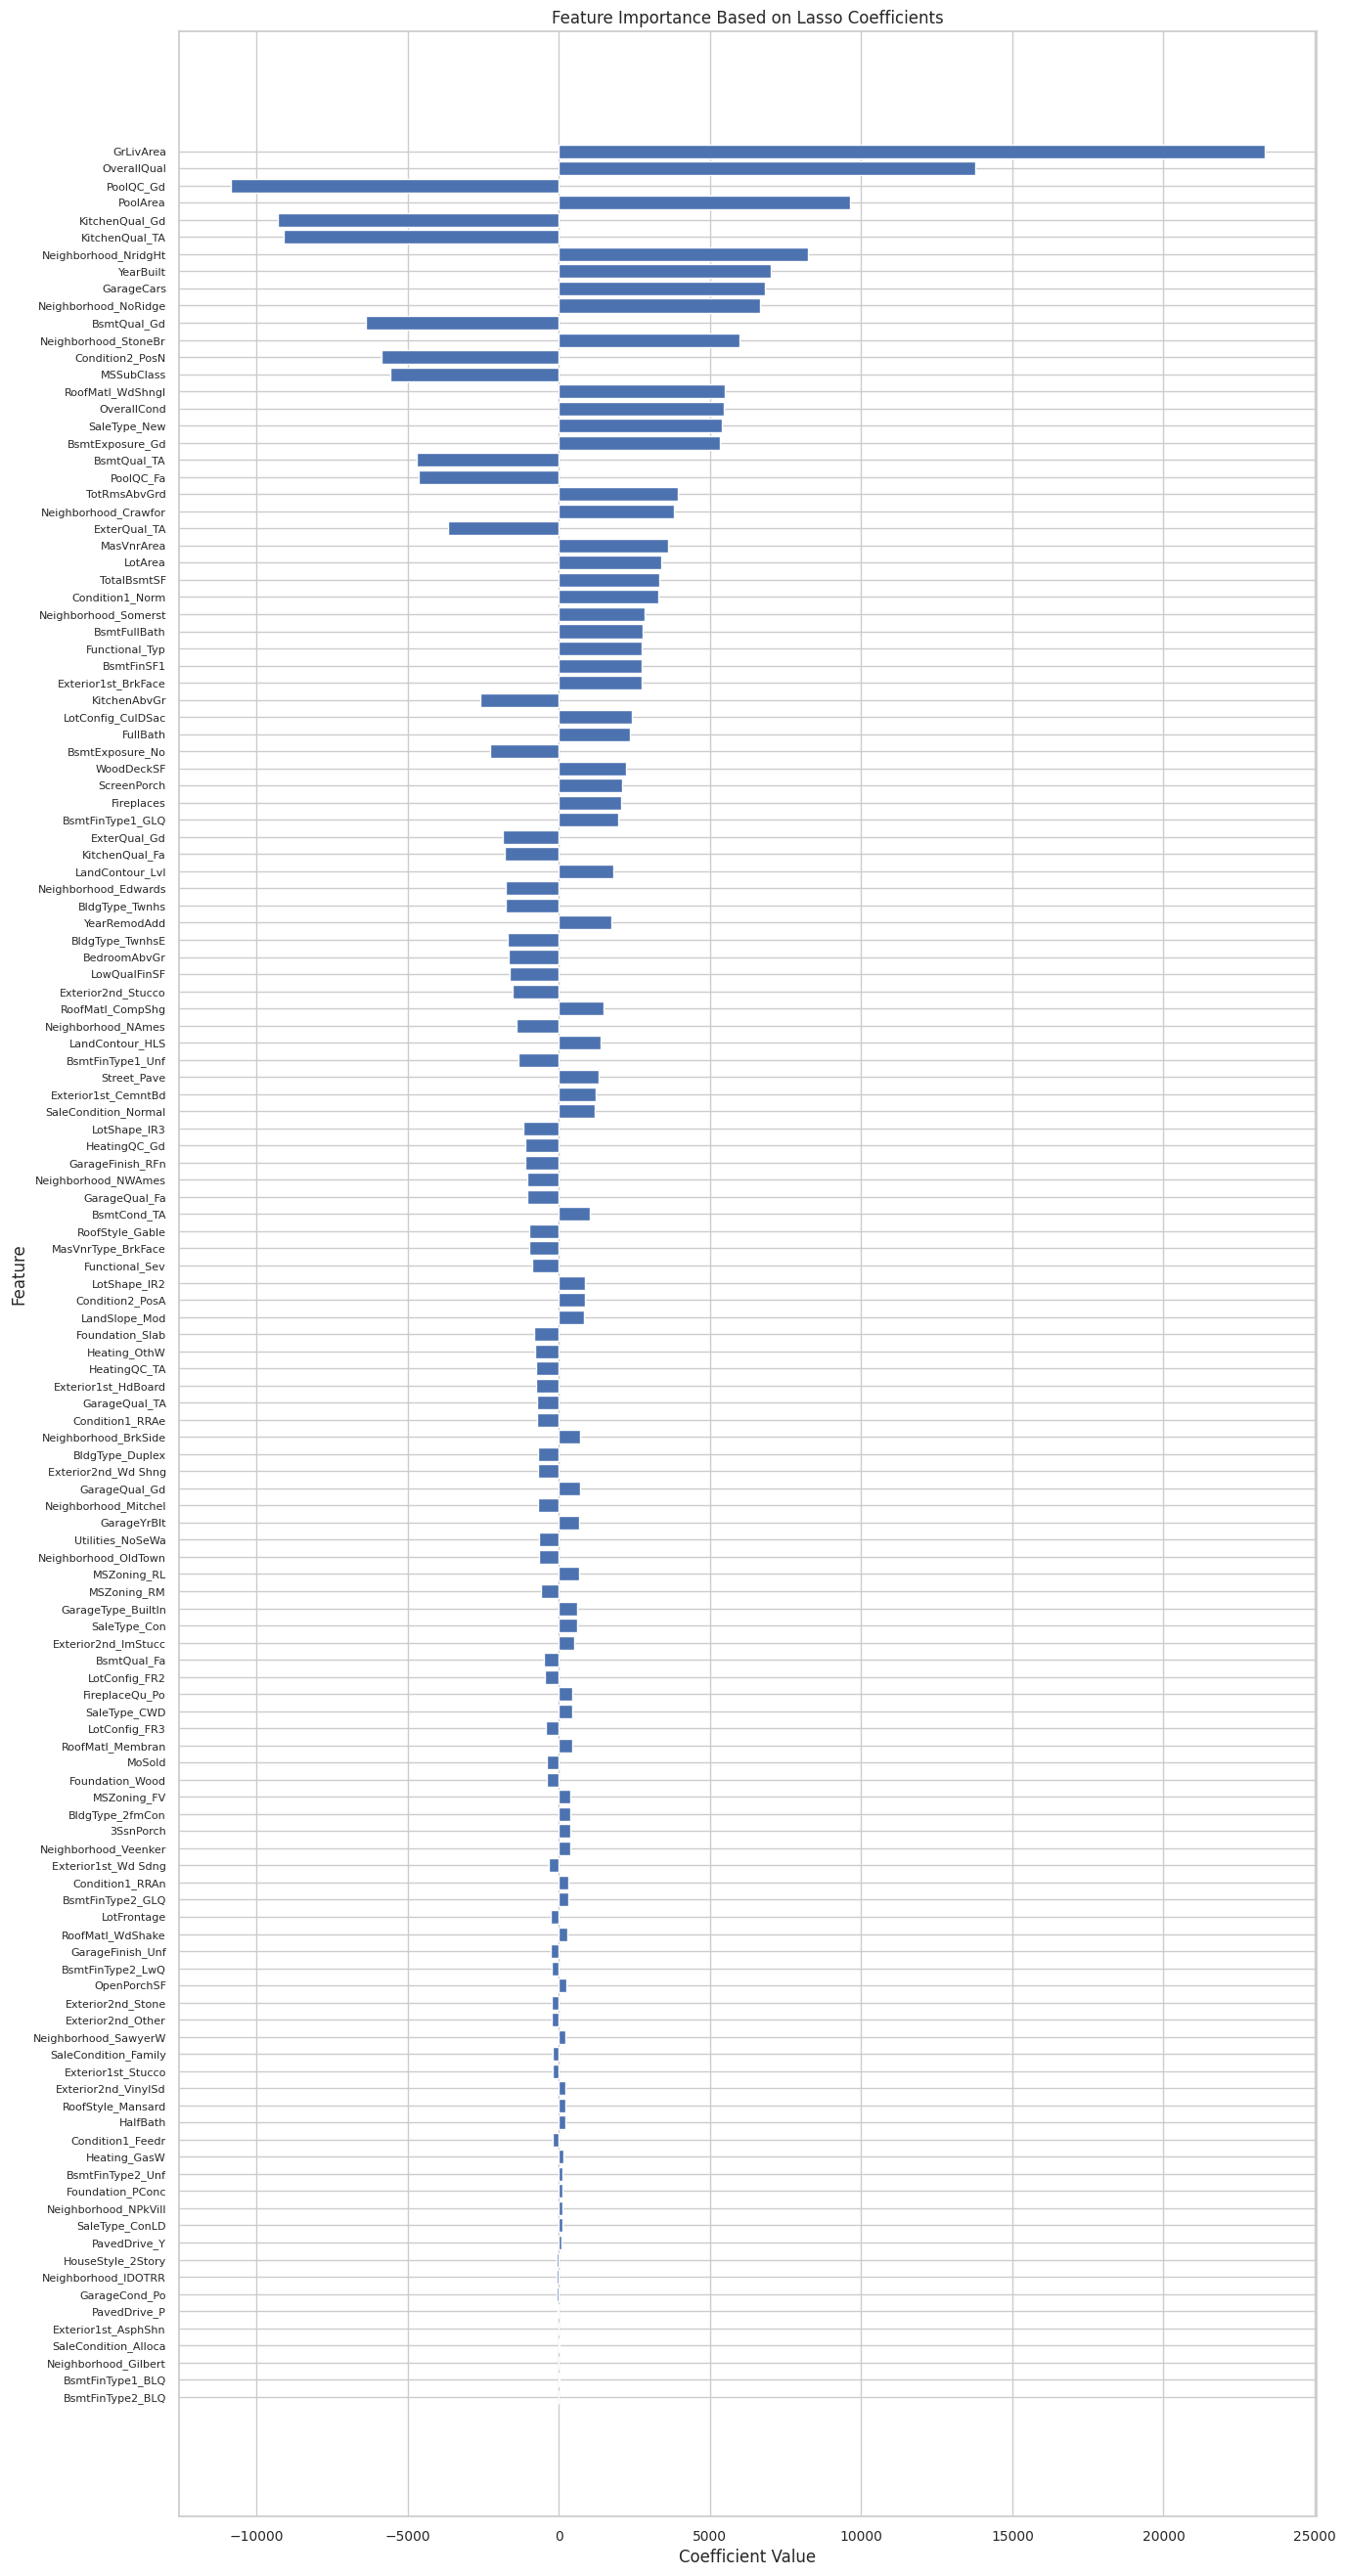

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Путь к файлу
file_path = '/content/drive/My Drive/train[1].csv'

# Загрузка данных
df = pd.read_csv(file_path)

# Преобразование категориальных признаков в числовые с помощью get_dummies
df_encoded = pd.get_dummies(df, drop_first=True, dtype=float)

# Разделение на признаки и целевую переменную
X = df_encoded.drop(columns=['SalePrice'])
y = df_encoded['SalePrice']

numerical_cols = X.select_dtypes(include=['float64']).columns
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].mean())

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Обучение модели Lasso с оптимальным alpha
lasso = Lasso(alpha=491, random_state=333, max_iter=10000)
lasso.fit(X_scaled, y)

# Получение коэффициентов модели
coefficients = lasso.coef_

# Преобразуем коэффициенты в DataFrame
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Удаление признаков с нулевыми коэффициентами
coef_df_nonzero = coef_df[coef_df['Coefficient'] != 0]

# Сортировка по абсолютному значению коэффициентов
coef_df_nonzero = coef_df_nonzero.reindex(
    coef_df_nonzero['Coefficient'].abs().sort_values(ascending=False).index)

# Вывод количества ненулевых признаков
nonzero_count = len(coef_df_nonzero)
print(f"Количество ненулевых признаков: {nonzero_count}")

# Построение гистограммы магнитуды признаков
plt.figure(figsize=(15, nonzero_count * 0.25))  # Увеличиваем высоту графика в зависимости от количества признаков
plt.barh(coef_df_nonzero['Feature'], coef_df_nonzero['Coefficient'], color='b')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance Based on Lasso Coefficients')
plt.gca().invert_yaxis() # Инвертируем ось Y для отображения больших значений наверху
plt.grid(True)
plt.xticks(fontsize=10)  # Настройка размера шрифта по оси X
plt.yticks(fontsize=8)  # Уменьшение размера шрифта по оси Y
plt.show()


In [43]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Путь к файлу
file_path = '/content/drive/My Drive/train[1].csv'

# Загрузка данных
df = pd.read_csv(file_path)

# Преобразование категориальных признаков в числовые с помощью get_dummies
df_encoded = pd.get_dummies(df, drop_first=True, dtype=float)

# Разделение на признаки и целевую переменную
X = df_encoded.drop(columns=['SalePrice'])
y = df_encoded['SalePrice']

numerical_cols = X.select_dtypes(include=['float64']).columns
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].mean())

# Нормализация данных (Lasso чувствителен к масштабу данных)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Обучаем модель Lasso с определённым значением alpha (оптимальным, найденным ранее в задаче 7.2)
lasso_model = Lasso(alpha=491, random_state=333, max_iter=10000)

# Кросс-валидация с подсчётом MSE (с использованием отрицательной MSE)
lasso_scores = cross_val_score(
    lasso_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

# Печатаем среднее значение MSE для Lasso (переводим отрицательные значения обратно в положительные)
lasso_mse_mean = -np.mean(lasso_scores)
print(f"Среднее MSE для модели Lasso: {lasso_mse_mean}")

# Теперь для сравнения посчитаем MSE для обычной линейной регрессии
linear_model = LinearRegression()

# Кросс-валидация для обычной линейной регрессии
linear_scores = cross_val_score(
    linear_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

# Печатаем среднее значение MSE для линейной регрессии
linear_mse_mean = -np.mean(linear_scores)
print(f"Среднее MSE для обычной линейной регрессии: {linear_mse_mean}")

# Сравнение моделей
if lasso_mse_mean < linear_mse_mean:
    print("Lasso регрессия работает лучше, чем простая линейная регрессия.")
else:
    print("Линейная регрессия работает лучше, чем Lasso.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Среднее MSE для модели Lasso: 1129430492.2810786
Среднее MSE для обычной линейной регрессии: 3.8401514300896816e+34
Lasso регрессия работает лучше, чем простая линейная регрессия.


## 1.8 Предсказание на отложенной выборке (3 балла)

- Используя [sklearn.model_selection.train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) разбейте датасет на 2 части - тренировочную и тестовую в соотношении 0.33. Не забудьте перемешать!
- Напечатайте размерность X_train и X_test

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Путь к файлу
file_path = '/content/drive/My Drive/train[1].csv'

# Загрузка данных
df = pd.read_csv(file_path)

# Преобразование категориальных признаков в числовые с помощью get_dummies
df_encoded = pd.get_dummies(df, drop_first=True, dtype=float)

# Разделение на признаки и целевую переменную
X = df_encoded.drop(columns=['SalePrice'])
y = df_encoded['SalePrice']

# Разделение данных на признаки (X) и целевую переменную (y)
X = df.drop(columns=['SalePrice'])  # Признаки
y = df['SalePrice']  # Целевая переменная

# Разделение данных на тренировочную и тестовую выборки с соотношением 0.33
# Параметр random_state=33 обеспечивает повторяемость результатов
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=333, shuffle=True)

# Печать размерностей полученных выборок
print(f"Размер X_train: {X_train.shape}")
print(f"Размер X_test: {X_test.shape}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Размер X_train: (978, 80)
Размер X_test: (482, 80)


Теперь, возьмите вашу самую мощную модель(не тренированную!). Запустите её тренировку по тренировочной выборке X_train, y_train с помощью функции `fit`. Постройте предсказания с помощью функции `predict`.

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Путь к файлу
file_path = '/content/drive/My Drive/train[1].csv'

# Загрузка данных
df = pd.read_csv(file_path)

# Преобразование категориальных признаков в числовые с помощью get_dummies
df_encoded = pd.get_dummies(df, drop_first=True, dtype=float)

# Разделение на признаки и целевую переменную
X = df_encoded.drop(columns=['SalePrice'])
y = df_encoded['SalePrice']

numerical_cols = X.select_dtypes(include=['float64']).columns
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].mean())

# Разделение данных на тренировочную и тестовую выборки с соотношением 0.33 и перемешиванием
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=333, shuffle=True)

# Нормализация данных (важно для Lasso, так как оно чувствительно к масштабу данных)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучаем модель Lasso с определённым значением alpha (оптимальным, найденным ранее в задаче 7.2)
lasso_model = Lasso(alpha=491, random_state=333)

# Обучение модели на тренировочных данных
lasso_model.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred = lasso_model.predict(X_test_scaled)

# Вывод предсказаний для тестовой выборки
print("Предсказания на тестовой выборке:")
print(y_pred)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Предсказания на тестовой выборке:
[106103.63024992 122536.31495422 416273.16377633 201242.15449492
 329492.73713197 218346.86760907 152956.98155465 260656.60763254
 134303.10929958 120692.74148524 637157.66301749 204561.8588099
 146839.75516851  83602.30337186 212400.95236054 214477.81108328
 107743.52108996 266857.04750034 177137.55562854 205218.80568532
 181841.35683281 127720.15737228 148278.62164504  92959.01512329
 208492.63563114 119000.15777065  81218.16486327 163098.81921101
 168841.11407644 192635.04445146 159864.93448381 150194.99568816
  94642.1628058  239877.3374304  179242.3788691  118415.7123389
 102324.26723995 146604.02186355  66612.63895302 101760.10432481
 324219.9061285  242923.06560228 143713.97682336 149198.51243642
 236073.82428575  87246.56057702 182234.96794817 301974.40929547
 193108.72324884 114969.1598615  226165.58202834 161399.100

Визуализируйте scatter plot предсказанных значений и настоящих (`y_test`). У вас должен получиться график, точки которого расположены приблизительно вдоль некоторой прямой с разбросом. Идеальный предсказатель будет выглядить как набор точек вдоль прямой без разброса.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


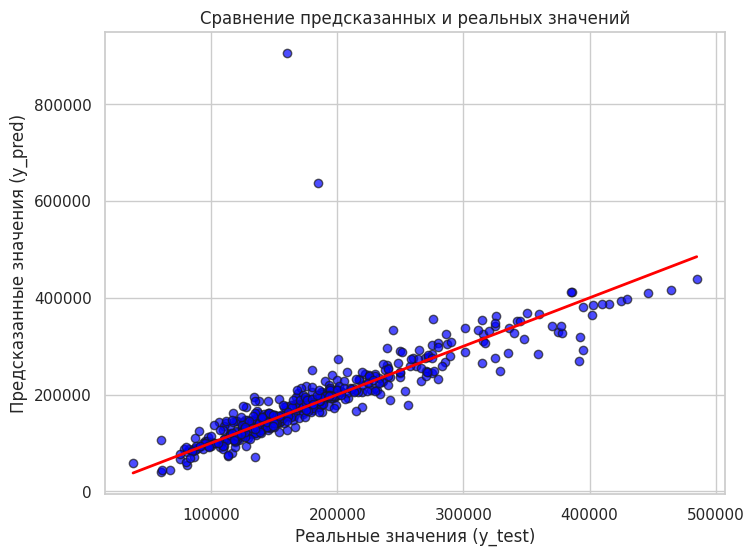

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Путь к файлу
file_path = '/content/drive/My Drive/train[1].csv'

# Загрузка данных
df = pd.read_csv(file_path)

# Преобразование категориальных признаков в числовые с помощью get_dummies
df_encoded = pd.get_dummies(df, drop_first=True, dtype=float)

# Разделение на признаки и целевую переменную
X = df_encoded.drop(columns=['SalePrice'])
y = df_encoded['SalePrice']

numerical_cols = X.select_dtypes(include=['float64']).columns
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].mean())

# Разделение данных на тренировочную и тестовую выборки с соотношением 0.33 и перемешиванием
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=333, shuffle=True)

# Нормализация данных (важно для Lasso, так как оно чувствительно к масштабу данных)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучаем модель Lasso на тренировочных данных с определённым значением alpha (оптимальным, найденным ранее в задаче 7.2)
lasso_model = Lasso(alpha=491, random_state=333)
lasso_model.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred = lasso_model.predict(X_test_scaled)

# Визуализация scatter plot для предсказанных и реальных значений
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', lw=2)  # Линия идеальных предсказаний
plt.xlabel('Реальные значения (y_test)')
plt.ylabel('Предсказанные значения (y_pred)')
plt.title('Сравнение предсказанных и реальных значений')
plt.grid(True)
plt.show()

## 1.9 Ограниченная версия ( 4 балла)

Помните в самом начале мы оставили очень мало признаков по данным из heatmap. Настало время проверить как он себя покажет! К счастью они все сразу числовые, а не категориальные. Переиспользуйте тот дадасет, где вы уже поборолись с пропусками.
Снова выделите отдельно X и y и запустите кроссвалидацию c 5 фолдами по Lasso с `alpha=1`.

In [47]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

# Путь к файлу
file_path = '/content/drive/My Drive/train[1].csv'

# Загрузка данных
df = pd.read_csv(file_path)

# Преобразование категориальных признаков в числовые с помощью get_dummies
df_encoded = pd.get_dummies(df, drop_first=True, dtype=float)

# Вычисление корреляционной матрицы для закодированных данных
corr_matrix = df_encoded.corr()

# Найдем признаки, которые слабо коррелируют с SalePrice (менее 0.5 по абсолютному значению)
weak_corr = corr_matrix['SalePrice'][corr_matrix['SalePrice'].abs() < 0.5]

# Разделение на сильно коррелирующие признаки и целевую переменную
X = df_encoded.drop(columns=['SalePrice']).drop(
    columns=weak_corr.index.tolist())
y = df_encoded['SalePrice']

# Нормализация данных (Lasso чувствителен к масштабу данных)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Обучаем модель Lasso с определённым значением alpha, указанным в задаче
lasso_model = Lasso(alpha=1, random_state=333, max_iter=10000)

# Кросс-валидация с подсчётом MSE (с использованием отрицательной MSE)
lasso_scores = cross_val_score(
    lasso_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

# Печатаем среднее значение MSE для Lasso (переводим отрицательные значения обратно в положительные)
lasso_mse_mean = -np.mean(lasso_scores)
print(f"Среднее MSE для модели Lasso: {lasso_mse_mean}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Среднее MSE для модели Lasso: 1515809562.6247501


Можете посмотреть еще много разных примеров обработки этого датасета тут: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

А суть всего этого такова, что в итоге надо кучу времени потратить на подготовку признаков. Смотреть на кучу графиков а потом стакать модели.